In [1]:
!pip install music21

     |████████████████████████████████| 19.2 MB 15.5 MB/s eta 0:00:01     |███████████████████████         | 13.8 MB 15.5 MB/s eta 0:00:01
  Created wheel for music21: filename=music21-6.3.0-py3-none-any.whl size=21888020 sha256=3c9ddcc8f6233425fa93bba877460ac0b922809bad0d1263512e9f5f9084c063
  Stored in directory: /Users/gilmer/Library/Caches/pip/wheels/6a/d0/ae/11a9d9a4052ed2094afc14daf1f5a39569890dedb95be40612
Successfully built music21


In [6]:
from music21 import converter, instrument, note, chord

In [7]:
#defining function to read MIDI files
def read_midi(file):
    print("Loading Music File:",file)
    notes=[]
    notes_to_parse = None
    #parsing a midi file
    midi = converter.parse(file)
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    #Looping over all the instruments
    for part in s2.parts:
        #select elements of only piano
        if 'Piano' in str(part):        
            notes_to_parse = part.recurse()    
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:      
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
    return np.array(notes)

In [8]:
import os
import numpy as np

path='schubert/'
files=[i for i in os.listdir(path) if i.endswith(".mid")]
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: schubert/schumm-1.mid
Loading Music File: schubert/schumm-2.mid
Loading Music File: schubert/schub_d960_4.mid
Loading Music File: schubert/schumm-3.mid
Loading Music File: schubert/schub_d960_1.mid
Loading Music File: schubert/schumm-6.mid
Loading Music File: schubert/schumm-4.mid
Loading Music File: schubert/schub_d960_2.mid
Loading Music File: schubert/schub_d960_3.mid
Loading Music File: schubert/schumm-5.mid
Loading Music File: schubert/schuim-4.mid
Loading Music File: schubert/schuim-1.mid
Loading Music File: schubert/schuim-3.mid
Loading Music File: schubert/schuim-2.mid
Loading Music File: schubert/schubert_D850_4.mid
Loading Music File: schubert/schubert_D935_4.mid
Loading Music File: schubert/schub_d760_4.mid
Loading Music File: schubert/schubert_D850_1.mid
Loading Music File: schubert/schubert_D935_1.mid
Loading Music File: schubert/schub_d760_1.mid
Loading Music File: schubert/schubert_D850_2.mid
Loading Music File: schubert/schub_d760_3.mid
Loading Music

# Why load everything together. Treating it like it's one long song?
 Then the last note/chord of one song will be thought by the network moreso to be followed by an effectively random note/chord (that of the next song)

In [9]:
notes_ = [element for note_ in notes_array for element in note_]
unique_notes = list(set(notes_))
len(unique_notes)

304

(array([187.,  40.,  27.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4810e+02, 2.9520e+02, 4.4230e+02, 5.8940e+02,
        7.3650e+02, 8.8360e+02, 1.0307e+03, 1.1778e+03, 1.3249e+03,
        1.4720e+03]),
 <a list of 10 Patch objects>)

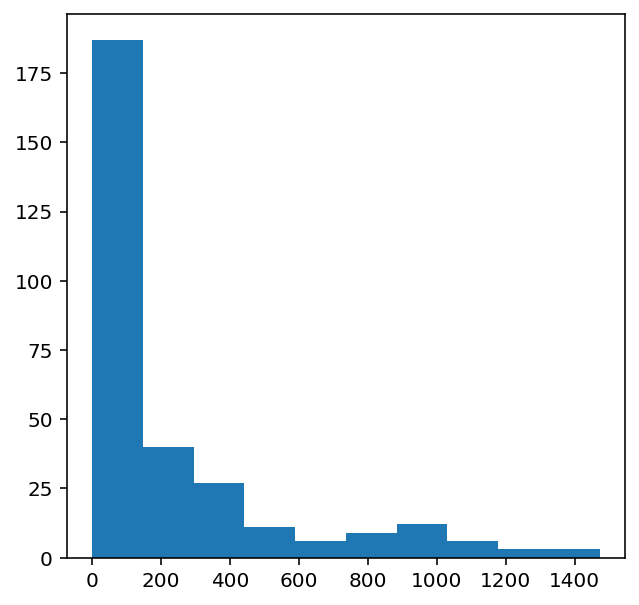

In [11]:
from collections import Counter
freq = dict(Counter(notes_))
import matplotlib.pyplot as plt
no = [count for _,count in freq.items()]
plt.figure(figsize = (5, 5))
plt.hist(no)

In [12]:
frequent_notes = [note_ for note_, count in freq.items() if count >= 50]
print(len(frequent_notes))

167


In [13]:
# Now prepare new musical files which contain only the top frequent notes
new_music = []

for notes in notes_array:
    temp = []
    for note_ in notes:
        if (note_ in frequent_notes):
            temp.append(note_)
    new_music.append(temp)
    
new_music = np.array(new_music)

# Now the ordering of notes must be even more messed up

In [14]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:  # for a song
    for i in range(0, len(note_) - no_of_timesteps, 1):
        input_ = note_[i: i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x = np.array(x)
y = np.array(y)

In [15]:
unique_x = list(set(x.ravel()))  # Why not use frequent_notes instead of recalculating
                                # I guess the order is different
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
# I would have done {note_: number for number note_ in enumerate(unique_x)}

In [22]:
print(sorted(frequent_notes))

['0', '0.2', '0.2.6', '0.3', '0.3.5', '0.3.6', '0.3.7', '0.4', '0.4.7', '0.5', '0.6', '1', '1.3', '1.4', '1.4.7', '1.4.7.10', '1.4.8', '1.5', '1.5.8', '1.6', '1.7', '10', '10.1', '10.1.3', '10.1.5', '10.2', '10.2.5', '10.3', '11', '11.2', '11.2.4', '11.2.6', '11.3', '11.3.6', '11.4', '2', '2.4', '2.4.8', '2.5', '2.5.7', '2.5.9', '2.6', '2.6.9', '2.7', '2.8', '3', '3.6', '3.6.8', '3.6.9', '3.7', '3.7.10', '3.8', '3.9', '4', '4.10', '4.7', '4.7.11', '4.7.9', '4.8', '4.8.11', '4.9', '5', '5.10', '5.11', '5.7', '5.8', '5.8.0', '5.8.11', '5.9', '5.9.0', '6', '6.10', '6.10.1', '6.11', '6.8', '6.9', '6.9.1', '7', '7.0', '7.10', '7.10.0', '7.10.1', '7.10.2', '7.11', '7.11.2', '7.9', '7.9.1', '8', '8.0', '8.0.3', '8.1', '8.11', '8.11.2', '8.11.3', '9', '9.0', '9.0.2', '9.0.4', '9.1', '9.1.4', '9.2', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B-1', 'B-2', 'B-3', 'B-4', 'B-5', 'B-6', 'B1', 'B2', 'B3', 'B4', 'B5', 'C#2', 'C#3', 'C#4', 'C#5', 'C#6', 'C#7', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'D2', 'D3', 

In [23]:
print(sorted(unique_x))

['0', '0.2', '0.2.6', '0.3', '0.3.5', '0.3.6', '0.3.7', '0.4', '0.4.7', '0.5', '0.6', '1', '1.3', '1.4', '1.4.7', '1.4.7.10', '1.4.8', '1.5', '1.5.8', '1.6', '1.7', '10', '10.1', '10.1.3', '10.1.5', '10.2', '10.2.5', '10.3', '11', '11.2', '11.2.4', '11.2.6', '11.3', '11.3.6', '11.4', '2', '2.4', '2.4.8', '2.5', '2.5.7', '2.5.9', '2.6', '2.6.9', '2.7', '2.8', '3', '3.6', '3.6.8', '3.6.9', '3.7', '3.7.10', '3.8', '3.9', '4', '4.10', '4.7', '4.7.11', '4.7.9', '4.8', '4.8.11', '4.9', '5', '5.10', '5.11', '5.7', '5.8', '5.8.0', '5.8.11', '5.9', '5.9.0', '6', '6.10', '6.10.1', '6.11', '6.8', '6.9', '6.9.1', '7', '7.0', '7.10', '7.10.0', '7.10.1', '7.10.2', '7.11', '7.11.2', '7.9', '7.9.1', '8', '8.0', '8.0.3', '8.1', '8.11', '8.11.2', '8.11.3', '9', '9.0', '9.0.2', '9.0.4', '9.1', '9.1.4', '9.2', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B-1', 'B-2', 'B-3', 'B-4', 'B-5', 'B-6', 'B1', 'B2', 'B3', 'B4', 'B5', 'C#2', 'C#3', 'C#4', 'C#5', 'C#6', 'C#7', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'D2', 'D3', 

In [24]:
# Prepare integer sequences for input data
x_seq = []
for i in x:
    temp = []
    for j in i:
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [25]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq = np.array([y_note_to_int[i] for i in y])

In [26]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq, y_seq, test_size = 0.2, random_state = 42)

In [57]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Activation
def lstm():
    model = Sequential()
#    model.add(Input(shape = (no_of_timesteps,)))
    model.add(LSTM(128, return_sequences = True))  # How come we dont have to specify input_shape here?
    model.add(LSTM(128))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(len(frequent_notes)))
    model.add(Activation('softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [58]:
import random
ind = np.random.randint(0, len(x_val) - 1)
random_music = x_val[ind]

model = lstm()
predictions = []
for i in range(10):
    random_music = random_music.reshape(1, no_of_timesteps, 1) # fixed, LSTM now expects inputs in this shape
                                                                
    print(random_music)
    prob = model.predict(random_music)[0]
    y_pred = np.argmax(prob, axis = 0)
    predictions.append(y_pred)
    
    random_music = np.insert(random_music[0], len(random_music[0]), y_pred)
    random_music = random_music[1:]
    
print(predictions)

[[[ 11]
  [117]
  [116]
  [130]
  [ 47]
  [124]
  [130]
  [160]
  [130]
  [100]
  [130]
  [ 68]
  [100]
  [118]
  [129]
  [  9]
  [128]
  [  9]
  [118]
  [ 97]
  [  9]
  [118]
  [100]
  [ 97]
  [143]
  [138]
  [ 97]
  [ 55]
  [ 11]
  [118]
  [129]
  [100]]]


TypeError: in user code:

    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:659 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1183 call
        runtime) = lstm_with_backend_selection(**normal_lstm_kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1558 lstm_with_backend_selection
        **params)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2828 __call__
        graph_function, args, kwargs = self._maybe_define_function(args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py:3213 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py:3075 _create_graph_function
        capture_by_value=self._capture_by_value),
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:986 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1315 standard_lstm
        zero_output_for_mask=zero_output_for_mask)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4214 rnn
        input_time_zero, tuple(initial_states) + tuple(constants))
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1291 step
        z = K.dot(cell_inputs, kernel)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:1831 dot
        out = math_ops.matmul(x, y)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3254 matmul
        a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py:5642 mat_mul
        name=name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:506 _apply_op_helper
        inferred_from[input_arg.type_attr]))

    TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type int64 of argument 'a'.


In [59]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[i] for i in predictions]

In [82]:
from music21 import stream
def convert_to_midi(prediction_output):
    offset = 0
    output_notes = []
    
    for pattern in prediction_output:
        if (('.' in pattern) or pattern.isdigit()): # chord
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                cn = int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else: # note
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music_longer.mid')

In [63]:
convert_to_midi(predicted_notes)

In [ ]:
# Now if I wanted to train the model?
model = lstm()
x_tr = x_tr.reshape(len(x_tr), no_of_timesteps)
model.train()

In [64]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)

In [76]:
model = lstm()

x_tr = x_tr.reshape(x_tr.shape[0], no_of_timesteps, 1)
y_tr = y_tr.reshape(y_tr.shape[0], 1)
x_val = x_val.reshape(x_val.shape[0], no_of_timesteps, 1)
y_val = y_val.reshape(y_val.shape[0], 1)

x_tr = x_tr.astype('float32')
y_tr = y_tr.astype('float32')   # This also seems to be necessary now
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')

history = model.fit(x_tr, y_tr, batch_size = 128, epochs = 50, \
                    validation_data = (x_val, y_val), verbose = 1, callbacks = [mc])

Epoch 1/50
403/403 [==============================] - ETA: 0s - loss: 4.6848 - accuracy: 0.0356
Epoch 00001: val_loss improved from inf to 4.58769, saving model to best_model.h5
403/403 [==============================] - 82s 204ms/step - loss: 4.6848 - accuracy: 0.0356 - val_loss: 4.5877 - val_accuracy: 0.0413
Epoch 2/50
403/403 [==============================] - ETA: 0s - loss: 4.5030 - accuracy: 0.0516
Epoch 00002: val_loss improved from 4.58769 to 4.44986, saving model to best_model.h5
403/403 [==============================] - 83s 206ms/step - loss: 4.5030 - accuracy: 0.0516 - val_loss: 4.4499 - val_accuracy: 0.0573
Epoch 3/50
403/403 [==============================] - ETA: 0s - loss: 4.3326 - accuracy: 0.0713
Epoch 00003: val_loss improved from 4.44986 to 4.29038, saving model to best_model.h5
403/403 [==============================] - 83s 206ms/step - loss: 4.3326 - accuracy: 0.0713 - val_loss: 4.2904 - val_accuracy: 0.0805
Epoch 4/50
403/403 [==============================] - ET

Epoch 28/50
403/403 [==============================] - ETA: 0s - loss: 1.6496 - accuracy: 0.5637
Epoch 00028: val_loss did not improve from 3.27898
403/403 [==============================] - 77s 191ms/step - loss: 1.6496 - accuracy: 0.5637 - val_loss: 3.3270 - val_accuracy: 0.3247
Epoch 29/50
403/403 [==============================] - ETA: 0s - loss: 1.6003 - accuracy: 0.5751
Epoch 00029: val_loss did not improve from 3.27898
403/403 [==============================] - 76s 190ms/step - loss: 1.6003 - accuracy: 0.5751 - val_loss: 3.3616 - val_accuracy: 0.3261
Epoch 30/50
403/403 [==============================] - ETA: 0s - loss: 1.5534 - accuracy: 0.5891
Epoch 00030: val_loss did not improve from 3.27898
403/403 [==============================] - 76s 189ms/step - loss: 1.5534 - accuracy: 0.5891 - val_loss: 3.3711 - val_accuracy: 0.3333
Epoch 31/50
403/403 [==============================] - ETA: 0s - loss: 1.5031 - accuracy: 0.6012
Epoch 00031: val_loss did not improve from 3.27898
403/40

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [77]:
random_music = x_val[ind]

predictions_new = []
for i in range(10):
    random_music = random_music.reshape(1, no_of_timesteps, 1) # fixed from the above, LSTM expets inputs in shape
                                                               # (# samples, time steps, features)
    print(random_music)
    prob = model.predict(random_music)[0]
    y_pred = np.argmax(prob, axis = 0)
    predictions_new.append(y_pred)
    
    random_music = np.insert(random_music[0], len(random_music[0]), y_pred)
    random_music = random_music[1:]
    
print(predictions_new)

[[[ 11.]
  [117.]
  [116.]
  [130.]
  [ 47.]
  [124.]
  [130.]
  [160.]
  [130.]
  [100.]
  [130.]
  [ 68.]
  [100.]
  [118.]
  [129.]
  [  9.]
  [128.]
  [  9.]
  [118.]
  [ 97.]
  [  9.]
  [118.]
  [100.]
  [ 97.]
  [143.]
  [138.]
  [ 97.]
  [ 55.]
  [ 11.]
  [118.]
  [129.]
  [100.]]]
[[[117.]
  [116.]
  [130.]
  [ 47.]
  [124.]
  [130.]
  [160.]
  [130.]
  [100.]
  [130.]
  [ 68.]
  [100.]
  [118.]
  [129.]
  [  9.]
  [128.]
  [  9.]
  [118.]
  [ 97.]
  [  9.]
  [118.]
  [100.]
  [ 97.]
  [143.]
  [138.]
  [ 97.]
  [ 55.]
  [ 11.]
  [118.]
  [129.]
  [100.]
  [ 97.]]]
[[[116.]
  [130.]
  [ 47.]
  [124.]
  [130.]
  [160.]
  [130.]
  [100.]
  [130.]
  [ 68.]
  [100.]
  [118.]
  [129.]
  [  9.]
  [128.]
  [  9.]
  [118.]
  [ 97.]
  [  9.]
  [118.]
  [100.]
  [ 97.]
  [143.]
  [138.]
  [ 97.]
  [ 55.]
  [ 11.]
  [118.]
  [129.]
  [100.]
  [ 97.]
  [ 11.]]]
[[[130.]
  [ 47.]
  [124.]
  [130.]
  [160.]
  [130.]
  [100.]
  [130.]
  [ 68.]
  [100.]
  [118.]
  [129.]
  [  9.]
  [128.]
  [ 

In [79]:
predicted_notes_new = [x_int_to_note[i] for i in predictions_new]
convert_to_midi(predicted_notes_new)

In [ ]:
# I listened to this music_new.mid file that I just generated.
# It's quite short and boring
# To make it longer just increase the loop time. Would be helpful
# to have a function

In [84]:
def generate_musical_sequence(model, input_sequence, output_length = 10):
    predictions = []
    for i in range(output_length):
        input_sequence = input_sequence.reshape(1, no_of_timesteps, 1) # fixed from the above, LSTM expets inputs in shape
                                                               # (# samples, time steps, features)
        prob = model.predict(input_sequence)[0]
        y_pred = np.argmax(prob, axis = 0)
        predictions.append(y_pred)
    
        input_sequence = np.insert(input_sequence[0], len(input_sequence[0]), y_pred)
        input_sequence = input_sequence[1:]
    return predictions

In [85]:
random_music = x_val[ind]
predicted_notes_100 = [x_int_to_note[i] for i in generate_musical_sequence(model, random_music, 100)]
convert_to_midi(predicted_notes_100)